# Mount GDrive and run!

In [ ]:
!nvidia-smi

Sun Dec 13 14:18:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    52W /  70W |      0MiB / 15079MiB |      3%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
%cd /content/
!cp /content/drive/MyDrive/cv_project/CA-Netv3.zip /content/CA-Netv3.zip
!unzip CA-Netv3.zip -d /content/
%cd CA-Net

Streaming output truncated to the last 5000 lines.
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0009929.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0014580.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0011176.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0015208.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0010862.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0009950.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0012508.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0011294.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0002287.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0012191.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task1_npy_all/image/ISIC_0013766.npy  
  inflating: /content/CA-Net/data/ISIC2018_Task

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip -d data
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Test_Input.zip -d data
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip -d data 

In [ ]:
!unzip data/ISIC2018_Task1-2_Test_Input.zip -d  data
!unzip data/ISIC2018_Task1-2_Training_Input.zip -d  data
!unzip data/ISIC2018_Task1_Training_GroundTruth.zip -d  data

In [2]:
%cd /content/CA-Net/saved_models/ISIC2018/folder1/Comp_Atten_Unet
!wget https://www.dropbox.com/s/538ncmquiw7lcek/min_loss_ISIC2018_checkpoint.pth.tar

/content/CA-Net/saved_models/ISIC2018/folder1/Comp_Atten_Unet
--2020-12-13 15:54:57--  https://github.com/HiLab-git/CA-Net/raw/master/saved_models/ISIC2018/folder0/Comp_Atten_Unet/min_loss_ISIC2018_checkpoint.pth.tar
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HiLab-git/CA-Net/master/saved_models/ISIC2018/folder0/Comp_Atten_Unet/min_loss_ISIC2018_checkpoint.pth.tar [following]
--2020-12-13 15:54:57--  https://raw.githubusercontent.com/HiLab-git/CA-Net/master/saved_models/ISIC2018/folder0/Comp_Atten_Unet/min_loss_ISIC2018_checkpoint.pth.tar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33567991 

In [ ]:
%%time
%cd /content/CA-Net
!python isic_preprocess.py
!python create_folder.py

In [39]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [68]:
%cd /content/CA-Net
!python main.py --resume saved_models/ISIC2018/folder1/Comp_Atten_Unet/min_loss_ISIC2018_checkpoint.pth.tar \
                                --data ISIC2018 --epochs 294  --batch_size 16 --val_folder folder1 \
                                --id Comp_Atten_Unet

# /content/drive/MyDrive/cv_project/checkpoints/

/content/CA-Net
Input arguments:
id               Comp_Atten_Unet
root_path        ./data/ISIC2018_Task1_npy_all
ckpt             ./saved_models
epochs           293
start_epoch      0
batch_size       16
lr_rate          0.0001
num_classes      2
num_input        3
weight_decay     1e-08
particular_epoch 30
save_epochs_steps 200
resume           /content/CA-Net/saved_models/ISIC2018/folder1/Comp_Atten_Unet/min_loss_ISIC2018_checkpoint.pth.tar
data             ISIC2018
out_size         (224, 300)
val_folder       folder1
Models are saved at ./saved_models/ISIC2018/folder1/Comp_Atten_Unet
loading the train,validation,test dataset ...
Loading is done

/content/CA-Net/Models/networks_other.py:42: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight.data, a=0, mode='fan_in')
/content/CA-Net/Models/networks_other.py:46: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, 

In [65]:
!python validation.py --data ISIC2018 --val_folder folder1 --id Comp_Atten_Unet

loading the test dataset ...
Loading is done

We can use 1 GPUs to train the network
/content/CA-Net/Models/networks_other.py:42: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight.data, a=0, mode='fan_in')
/content/CA-Net/Models/networks_other.py:46: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, 1.0, 0.02)
/content/CA-Net/Models/networks_other.py:47: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias.data, 0.0)
/content/CA-Net/Models/layers/nonlocal_layer.py:51: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(self.W[1].weight, 0)
/content/CA-Net/Models/layers/nonlocal_layer.py:52: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(self.W[1].bias, 0)
=> Loading checkpoint './saved_models/ISIC2018/folder1/Comp_Atte

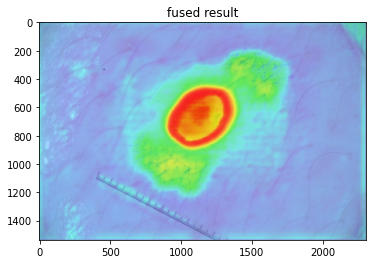

In [12]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def map_scalar_to_color(x):
    x_list = [0.0, 0.25, 0.5, 0.75, 1.0]
    c_list = [[0, 0, 255],
              [0, 255, 255],
              [0, 255, 0],
              [255, 255, 0],
              [255, 0, 0]]
    for i in range(len(x_list)):
        if(x <= x_list[i + 1]):
            x0 = x_list[i]
            x1 = x_list[i + 1]
            c0 = c_list[i]
            c1 = c_list[i + 1]
            alpha = (x - x0)/(x1 - x0)
            c = [c0[j]*(1 - alpha) + c1[j] * alpha for j in range(3)]
            c = [int(item) for item in c]
            return tuple(c)


def get_fused_heat_map(image, att):
    [H, W] = image.size
    img = Image.new('RGB', image.size, (255, 0, 0))
    
    for i in range(H):
        for j in range(W):
            p0 = image.getpixel((i,j))
            alpha = att.getpixel((i,j))
            p1 = map_scalar_to_color(alpha)
            alpha = 0.3 + alpha*0.5
            p = [int(p0[c] * (1 - alpha) + p1[c]*alpha) for c in range(3)]
            p = tuple(p)
            img.putpixel((i, j), p)
    return img



image_name = "./result/atten_map/ISIC_0015937.jpg"
scalar_name = "./result/atten_map/25_2_8_wgt"
save_name = "./result/atten_map/15937_wgt3_fused"

img = Image.open(image_name)
# img = np.load(image_name)
# img = Image.fromarray(np.uint8(img*255))
# load the scalar map, and normalize the inteinsty to  0 - 1
scl = Image.open(scalar_name).convert('L')
scl = np.asarray(scl)
scl = cv2.resize(scl, dsize=(img.size[0], img.size[1]), interpolation=cv2.INTER_NEAREST)
scl_norm = np.asarray(scl, np.float32)/255
scl_norm = Image.fromarray(scl_norm)

# convert the scalar map to heat map, and fuse it with the original image
img_scl = get_fused_heat_map(img, scl_norm)
img_scl.save(save_name, format='png')

plt.imshow(img_scl), plt.title('fused result')
# plt.colorbar()
plt.show()

In [70]:
# %cd /content 
# !zip -r CA-Netv3.zip CA-Net
# !cp CA-Netv3.zip /content/drive/MyDrive/cv_project/

/content
  adding: CA-Net/ (stored 0%)
  adding: CA-Net/utils/ (stored 0%)
  adding: CA-Net/utils/dice_loss.py (deflated 77%)
  adding: CA-Net/utils/__pycache__/ (stored 0%)
  adding: CA-Net/utils/__pycache__/transform.cpython-37.pyc (deflated 54%)
  adding: CA-Net/utils/__pycache__/transform.cpython-36.pyc (deflated 55%)
  adding: CA-Net/utils/__pycache__/evaluation.cpython-37.pyc (deflated 43%)
  adding: CA-Net/utils/__pycache__/evaluation.cpython-36.pyc (deflated 43%)
  adding: CA-Net/utils/__pycache__/dice_loss.cpython-37.pyc (deflated 54%)
  adding: CA-Net/utils/__pycache__/binary.cpython-36.pyc (deflated 80%)
  adding: CA-Net/utils/__pycache__/dice_loss.cpython-36.pyc (deflated 54%)
  adding: CA-Net/utils/__pycache__/binary.cpython-37.pyc (deflated 79%)
  adding: CA-Net/utils/transform.py (deflated 69%)
  adding: CA-Net/utils/binary.py (deflated 83%)
  adding: CA-Net/utils/evaluation.py (deflated 56%)
  adding: CA-Net/__pycache__/ (stored 0%)
  adding: CA-Net/__pycache__/main.cpy

In [71]:
from google.colab import drive
drive.flush_and_unmount()